<a href="https://colab.research.google.com/github/mercyIfeoluwa/Technidus-Machine-Learning-Comptition/blob/master/Prediction_of_Customer's_Purchase_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task Description**

In this notebook i will using my understanding of machine learning concepts learnt to create a model to predict a customers purchase behaviour. I will be using a bike company's customer data to create a classification model that predicts a customer's likelihood to buy a bike. 
The data includes demographic features and information about purchases they have made (purchase history of the customers). The Bike company is particularly interested in determining any apparent relationships between demographic features known about the customers and whether they will buy a bike. The notebook will be presented as follow: Data Preprocessing & Cleansing Exploratory data analysis & Visualisation Feature Engineering Data Modeling Evaluting the Model Conclusion

**Goal**

The goal is to predict the customers' purchase behaviour.

In [0]:
#UPLOAD
from google.colab import files
uploaded = files.upload()

Saving submission.csv to submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:

#IMPORT LIBRARIES
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from datetime import datetime
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from scipy import stats
from scipy.stats import norm, skew
from xgboost import XGBClassifier
from matplotlib import dates



In [0]:
#Reading out data from the dataset
#INITIATING TRAINING AND TEST DATA
train_data = pd.read_csv('train.csv')
#Viewing the first 5 rows
train_data.head()


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,14540.0,NaN,Randy,NaN,Lin,NaN,8848 Auburn,NaN,London,England,United Kingdom,W1Y 3RA,1 (11) 500 555-0138,4/18/1958,Bachelors,Manual,M,M,1.0,0.0,0.0,1.0,35455.0,70.0,1
1,18054.0,NaN,Jake,NaN,Zeng,NaN,4058 First Ave,NaN,Cliffside,British Columbia,Canada,V8Y 1L1,987-555-0118,10/6/1960,Bachelors,Professional,M,S,0.0,1.0,0.0,0.0,43980.0,69.0,0
2,16955.0,NaN,Nathaniel,NaN,Bradley,NaN,3679 Diablo View Road,NaN,Metchosin,British Columbia,Canada,V9,145-555-0167,8/18/1969,Bachelors,Skilled Manual,M,M,1.0,0.0,2.0,2.0,57713.0,102.0,0
3,11626.0,NaN,Destiny,NaN,Rogers,NaN,3588 Vancouver Way,NaN,San Francisco,California,United States,94109,262-555-0170,6/14/1973,Graduate Degree,Skilled Manual,F,M,1.0,0.0,0.0,1.0,53438.0,49.0,0
4,18651.0,NaN,Isaiah,A,Mitchell,NaN,5014 Steele Drive,NaN,Lynnwood,Washington,United States,98036,694-555-0195,5/6/1955,High School,Clerical,M,M,0.0,2.0,0.0,1.0,55291.0,73.0,0


In [0]:
#Viewing the last 5 rows
train_data.tail()


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
7681,19195.0,NaN,Darren,A,Romero,NaN,5038 Kenwal Rd,NaN,Birmingham,England,United Kingdom,B29 6SL,1 (11) 500 555-0150,5/26/1970,Partial College,Clerical,M,S,1.0,0.0,2.0,2.0,52622.0,87.0,1
7682,22174.0,NaN,Micah,NaN,Lu,NaN,5710 Ida Drive,NaN,Perth,South Australia,Australia,6006,1 (11) 500 555-0182,5/2/1952,High School,Skilled Manual,M,M,1.0,2.0,0.0,3.0,50085.0,73.0,0
7683,17665.0,NaN,Zachary,NaN,Jenkins,NaN,8922 Big Canyon Road,NaN,Oregon City,Oregon,United States,97045,560-555-0168,4/16/1955,High School,Clerical,M,M,0.0,2.0,0.0,2.0,50985.0,69.0,0
7684,12148.0,NaN,Gabrielle,A,Morris,NaN,8553 R St.,NaN,Salem,Oregon,United States,97301,458-555-0132,12/6/1964,Partial College,Professional,F,S,1.0,0.0,2.0,5.0,102378.0,72.0,1
7685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3814


In [0]:
#Drop last row; 7685
train_data = train_data[:-1]
train_data.tail()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
7680,13836.0,NaN,Dominic,C,Sara,NaN,Altendorfer Straße 70,NaN,Hof,Bayern,Germany,95010,1 (11) 500 555-0113,4/7/1976,Partial College,Clerical,M,S,0.0,1.0,0.0,0.0,51903.0,68.0,1
7681,19195.0,NaN,Darren,A,Romero,NaN,5038 Kenwal Rd,NaN,Birmingham,England,United Kingdom,B29 6SL,1 (11) 500 555-0150,5/26/1970,Partial College,Clerical,M,S,1.0,0.0,2.0,2.0,52622.0,87.0,1
7682,22174.0,NaN,Micah,NaN,Lu,NaN,5710 Ida Drive,NaN,Perth,South Australia,Australia,6006,1 (11) 500 555-0182,5/2/1952,High School,Skilled Manual,M,M,1.0,2.0,0.0,3.0,50085.0,73.0,0
7683,17665.0,NaN,Zachary,NaN,Jenkins,NaN,8922 Big Canyon Road,NaN,Oregon City,Oregon,United States,97045,560-555-0168,4/16/1955,High School,Clerical,M,M,0.0,2.0,0.0,2.0,50985.0,69.0,0
7684,12148.0,NaN,Gabrielle,A,Morris,NaN,8553 R St.,NaN,Salem,Oregon,United States,97301,458-555-0132,12/6/1964,Partial College,Professional,F,S,1.0,0.0,2.0,5.0,102378.0,72.0,1


In [0]:
train_data.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,7685.000000,7685.000000,7685.000000,7685.000000,7685.000000,7685.000000,7685.000000,7685.000000
mean,18763.213403,0.696682,1.569031,1.230839,2.151464,82323.659206,76.383995,0.496291
std,4832.429369,0.459721,1.177871,1.650189,1.727375,40368.317414,29.367313,0.500019
min,11001.000000,0.000000,0.000000,0.000000,0.000000,10063.000000,26.000000,0.000000
25%,14676.000000,0.000000,1.000000,0.000000,1.000000,50784.000000,53.000000,0.000000
50%,18493.000000,1.000000,2.000000,0.000000,2.000000,82158.000000,71.000000,0.000000
75%,22393.000000,1.000000,2.000000,2.000000,4.000000,109389.000000,89.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,193721.000000,176.000000,1.000000


In [0]:
#to view all the attributes in the dataset
train_data.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')

**Dataset Description**
The above dataset is quite interesting because it is a good mixture of categorical and numerical attributes. The dataset comprised of 25 different attributes of 7685 customers. The customers were described as either ‘Yes’ (1) or ‘No’ (0) on the basis of bike buyer or not. There are few missing values also. There are mainly two classes’ bike buyers or not.From the above tables it is clearly visible that only CustomerID, HomeOwnerFlag,	NumberCarsOwned	NumberChildrenAtHome,	TotalChildren,	YearlyIncome,	AveMonthSpend,	BikeBuyer
are real valued integers. 



**Data Preprocessing**
We will read the data from dataset and replace the null values. 

In [0]:
#to confirm if there are stilln missing values
train_data.isnull().any()

CustomerID              False
Title                    True
FirstName               False
MiddleName               True
LastName                False
Suffix                   True
AddressLine1            False
AddressLine2             True
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
AveMonthSpend           False
BikeBuyer               False
dtype: bool

In [0]:
train_data.isnull().sum()

CustomerID                 0
Title                   7644
FirstName                  0
MiddleName              3228
LastName                   0
Suffix                  7684
AddressLine1               0
AddressLine2            7550
City                       0
StateProvinceName          0
CountryRegionName          0
PostalCode                 0
PhoneNumber                0
BirthDate                  0
Education                  0
Occupation                 0
Gender                     0
MaritalStatus              0
HomeOwnerFlag              0
NumberCarsOwned            0
NumberChildrenAtHome       0
TotalChildren              0
YearlyIncome               0
AveMonthSpend              0
BikeBuyer                  0
dtype: int64

In [0]:
train_data['Title'].unique()

array([nan, 'Ms.', 'Sr.', 'Mr.'], dtype=object)

In [0]:
 data = train_data

From the dataset the birthdate of our customers have been given instead of the age. We will have to convert the birth date to age

In [0]:
#Alternative method for age calculation
data['BirthDate'] = pd.to_datetime(data['BirthDate'])  #to convert the Birthdate data type
now = datetime.now()    
data['Age'] = now - data['BirthDate'] 
data['Age'] = data['Age'] /  np.timedelta64(1, 'Y')

In [0]:
def round_age(age):
  return int(round(age))

In [0]:
data['Age'] = data['Age'].map(round_age)

In [0]:
data.head(3)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,14540.0,NaN,Randy,NaN,Lin,NaN,8848 Auburn,NaN,London,England,United Kingdom,W1Y 3RA,1 (11) 500 555-0138,1958-04-18,Bachelors,Manual,M,M,1.0,0.0,0.0,1.0,35455.0,70.0,1,62
1,18054.0,NaN,Jake,NaN,Zeng,NaN,4058 First Ave,NaN,Cliffside,British Columbia,Canada,V8Y 1L1,987-555-0118,1960-10-06,Bachelors,Professional,M,S,0.0,1.0,0.0,0.0,43980.0,69.0,0,59
2,16955.0,NaN,Nathaniel,NaN,Bradley,NaN,3679 Diablo View Road,NaN,Metchosin,British Columbia,Canada,V9,145-555-0167,1969-08-18,Bachelors,Skilled Manual,M,M,1.0,0.0,2.0,2.0,57713.0,102.0,0,51


I will drop the 'BirthDate' column as it has been transformed into the Age feature.

In [0]:
#dropping BirthDate
data.drop('BirthDate', axis = 1, inplace = True)


In [0]:
data.head(3)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,14540.0,NaN,Randy,NaN,Lin,NaN,8848 Auburn,NaN,London,England,United Kingdom,W1Y 3RA,1 (11) 500 555-0138,Bachelors,Manual,M,M,1.0,0.0,0.0,1.0,35455.0,70.0,1,62
1,18054.0,NaN,Jake,NaN,Zeng,NaN,4058 First Ave,NaN,Cliffside,British Columbia,Canada,V8Y 1L1,987-555-0118,Bachelors,Professional,M,S,0.0,1.0,0.0,0.0,43980.0,69.0,0,59
2,16955.0,NaN,Nathaniel,NaN,Bradley,NaN,3679 Diablo View Road,NaN,Metchosin,British Columbia,Canada,V9,145-555-0167,Bachelors,Skilled Manual,M,M,1.0,0.0,2.0,2.0,57713.0,102.0,0,51


In [0]:
len(data['PostalCode'].unique())

301

We can see that for some customers, we dont have information on their Title, Middlename, Suffix and AddressLine 2 as indicated by the number of null values. 
These missing information are not strong indicators on whether a customer will purchase a bike or not. However, lets try to understand why they are missing. So, for most of these values it could imply that the reason why they are missing is because they were intentionally not filled by the customer because it doesn't apply to them.  For the purpose of what we are are trying to achieve with this datset, we will be dropping these columns and others that are irrelevant to predicting whether a customer will purchase a bike or not. 

In [0]:
data = data.drop (['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'PhoneNumber'], axis=1)


In [0]:
#Confirming that there is no null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7685 entries, 0 to 7684
Data columns (total 16 columns):
City                    7685 non-null object
StateProvinceName       7685 non-null object
CountryRegionName       7685 non-null object
PostalCode              7685 non-null object
Education               7685 non-null object
Occupation              7685 non-null object
Gender                  7685 non-null object
MaritalStatus           7685 non-null object
HomeOwnerFlag           7685 non-null float64
NumberCarsOwned         7685 non-null float64
NumberChildrenAtHome    7685 non-null float64
TotalChildren           7685 non-null float64
YearlyIncome            7685 non-null float64
AveMonthSpend           7685 non-null float64
BikeBuyer               7685 non-null int64
Age                     7685 non-null int64
dtypes: float64(6), int64(2), object(8)
memory usage: 960.8+ KB


In [0]:
#Confirming final dataset after preprocessing
data.head()

,City,StateProvinceName,CountryRegionName,PostalCode,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,London,England,United Kingdom,W1Y 3RA,Bachelors,Manual,M,M,1.0,0.0,0.0,1.0,35455.0,70.0,1,62
1,Cliffside,British Columbia,Canada,V8Y 1L1,Bachelors,Professional,M,S,0.0,1.0,0.0,0.0,43980.0,69.0,0,59
2,Metchosin,British Columbia,Canada,V9,Bachelors,Skilled Manual,M,M,1.0,0.0,2.0,2.0,57713.0,102.0,0,51
3,San Francisco,California,United States,94109,Graduate Degree,Skilled Manual,F,M,1.0,0.0,0.0,1.0,53438.0,49.0,0,47
4,Lynnwood,Washington,United States,98036,High School,Clerical,M,M,0.0,2.0,0.0,1.0,55291.0,73.0,0,65


In [0]:
data['Education'].value_counts()

Bachelors              2294
Partial College        2117
High School            1361
Graduate Degree        1324
Partial High School     589
Name: Education, dtype: int64

In [0]:
data['Occupation'].value_counts()

Professional      2485
Skilled Manual    1845
Management        1330
Clerical          1095
Manual             930
Name: Occupation, dtype: int64

In [0]:
data.dtypes

City                     object
StateProvinceName        object
CountryRegionName        object
PostalCode               object
Education                object
Occupation               object
Gender                   object
MaritalStatus            object
HomeOwnerFlag           float64
NumberCarsOwned         float64
NumberChildrenAtHome    float64
TotalChildren           float64
YearlyIncome            float64
AveMonthSpend           float64
BikeBuyer                 int64
Age                       int64
dtype: object

**Exploratory - Data Analysis and Visualization**

In [0]:
data.head(2)

,City,StateProvinceName,CountryRegionName,PostalCode,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,London,England,United Kingdom,W1Y 3RA,Bachelors,Manual,M,M,1.0,0.0,0.0,1.0,35455.0,70.0,1,62
1,Cliffside,British Columbia,Canada,V8Y 1L1,Bachelors,Professional,M,S,0.0,1.0,0.0,0.0,43980.0,69.0,0,59


In [0]:
#Seperating numerical columns from categorical colunms
numerical_cols=['YearlyIncome','AveMonthSpend','Age','HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','BikeBuyer']
categorical_cols=['CountryRegionName', 'Education','Occupation','Gender','MaritalStatus','City','PostalCode', 'StateProvinceName']

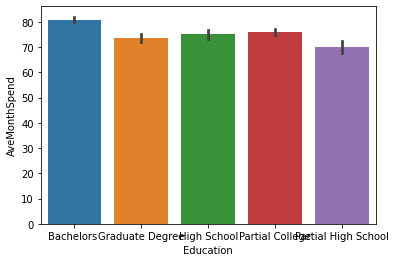

In [0]:
sns.barplot(data['Education'],data["AveMonthSpend"])
plt.show()

**Visualizations for the Categorical Columns**

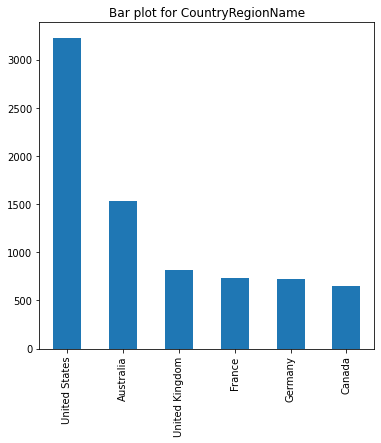

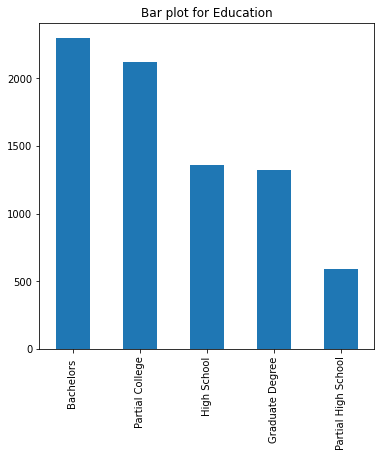

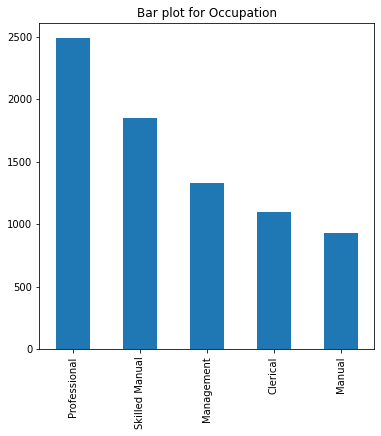

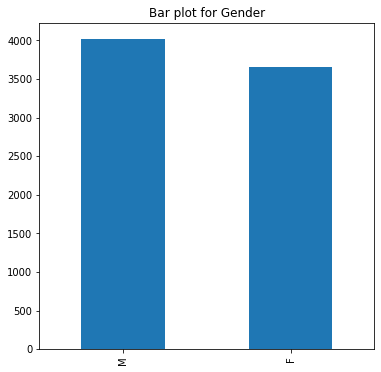

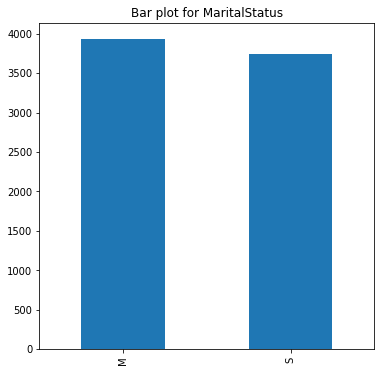

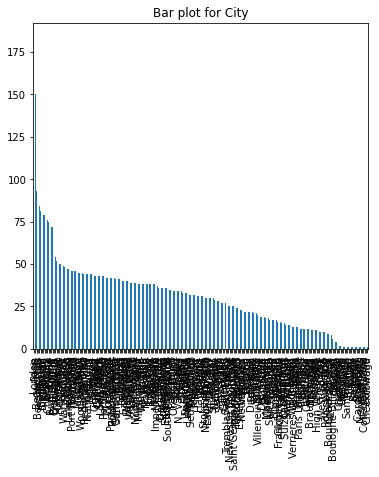

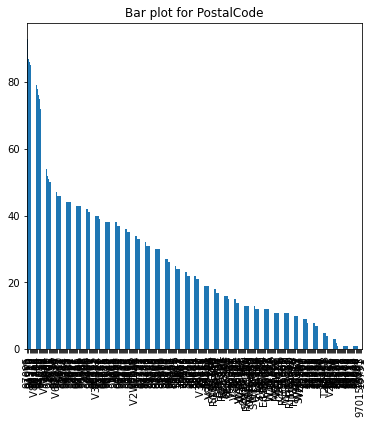

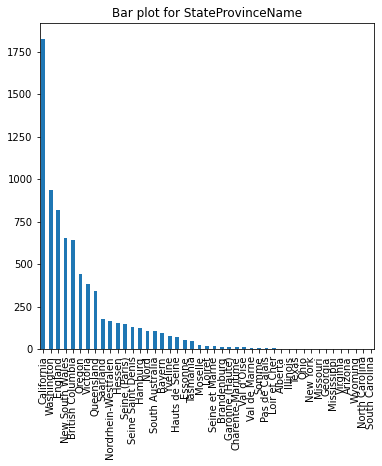

In [0]:
for col in categorical_cols:
    fig = plt.figure(figsize=(6,6)) # this is to define plot area
    ax = fig.gca() # to define axis  
    
    counts = data[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)


**Observations from the above Visualuzation**

Most of the Customers are from the United States, specifically based in California.
We have mostly educated customers with bachelors degree being the most.
Majority of the customers are professionals with a few manual workers.
We have more married customers than single customers, though the difference is slightly noticeable. 
We have slightly more men than women customers.
We have more married customers than single.
The highest level of education of the customers is a Bachelors degree.



**Visualizations for the Numerical Columns**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


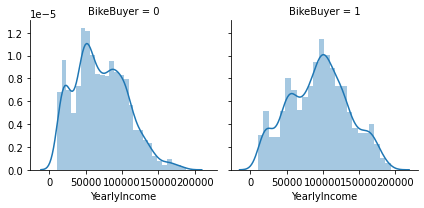

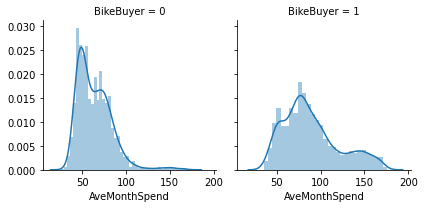

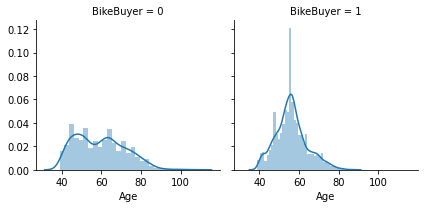

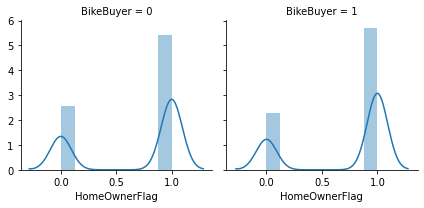

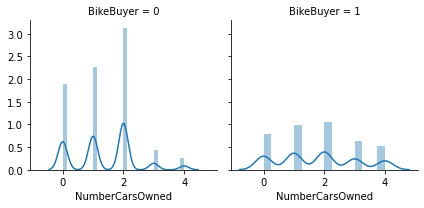

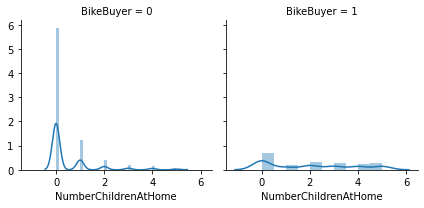

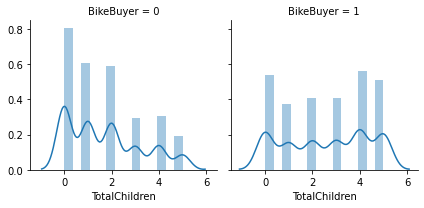

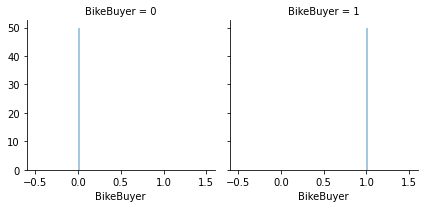

In [0]:
for col in numerical_cols:
    g = sns.FacetGrid(data, col='BikeBuyer')
    g = g.map(sns.distplot, col)

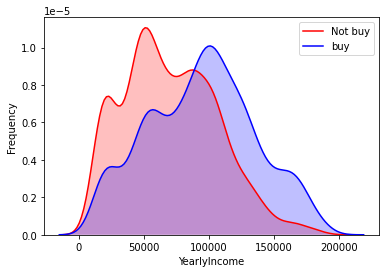

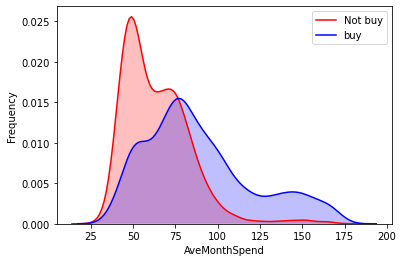

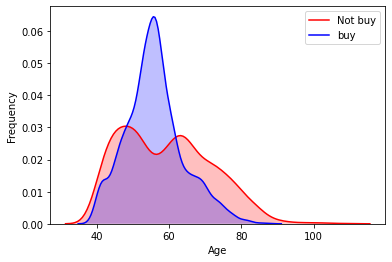

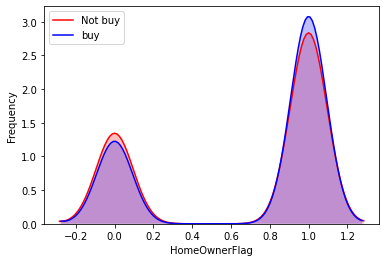

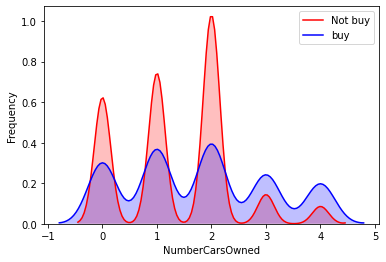

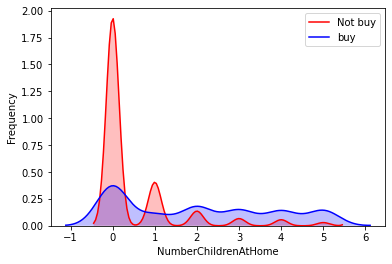

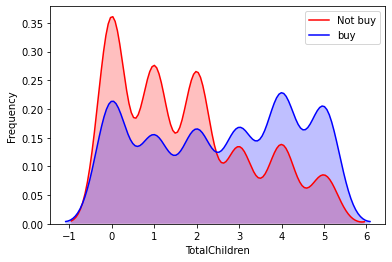

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


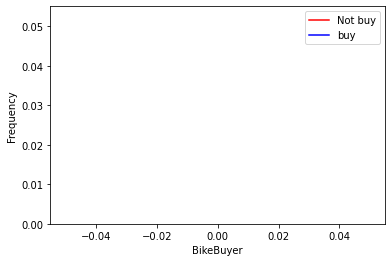

In [0]:
for col in numerical_cols:
    g = sns.kdeplot(data[col][(data["BikeBuyer"] == 0) & (data[col].notnull())], color="Red", shade = True)
    g = sns.kdeplot(data[col][(data["BikeBuyer"] == 1) & (data[col].notnull())], ax =g, color="Blue", shade= True)
    g.set_xlabel(col)
    g.set_ylabel("Frequency")
    g = g.legend(["Not buy","buy"])
    plt.show()

**Few Observations from the above visualization**

There are slightly more people who have not bought bikes.
Most of the customers do not have their children at home.And they have mostly not bought bikes.
Most of the customers own their houses.
Most of the customers own their own cars. They have mostly not bought bikes


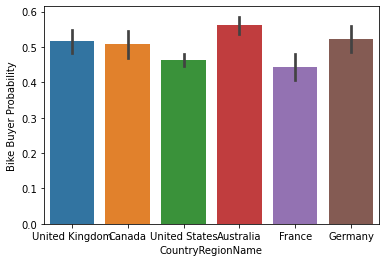

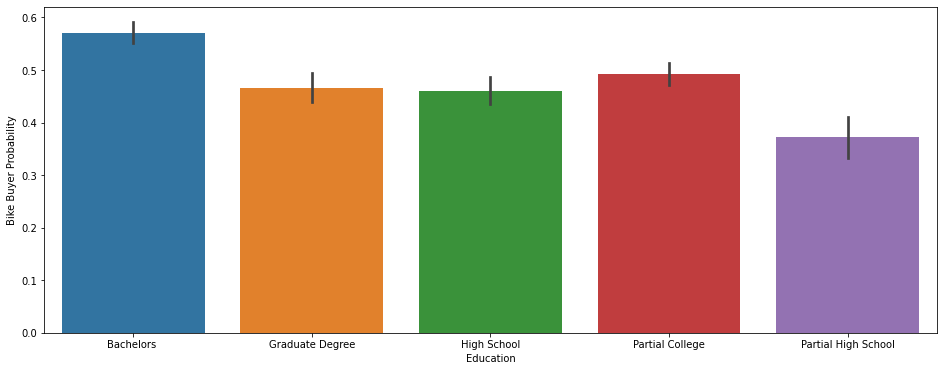

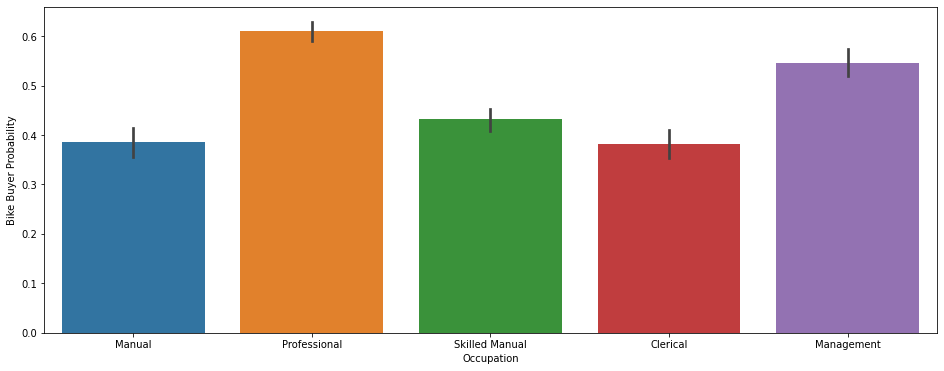

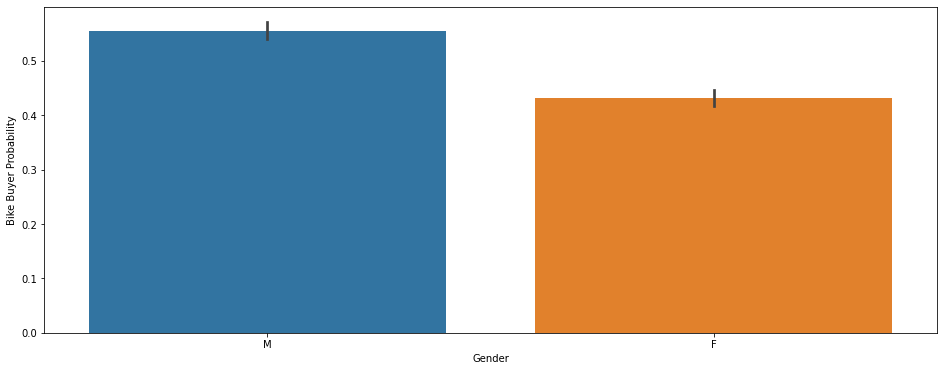

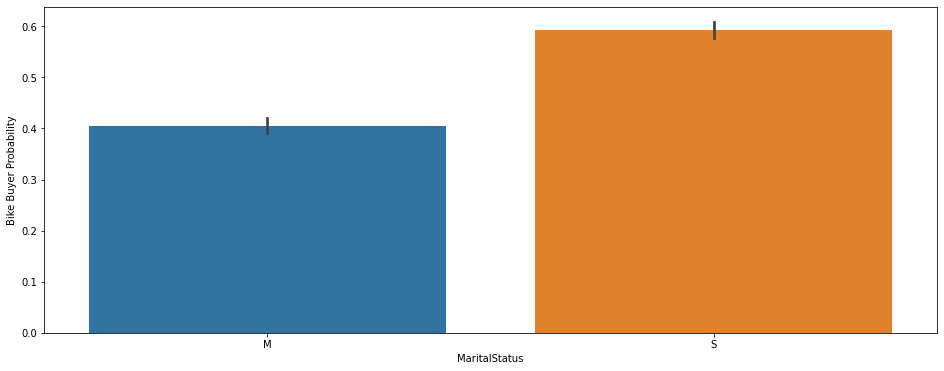

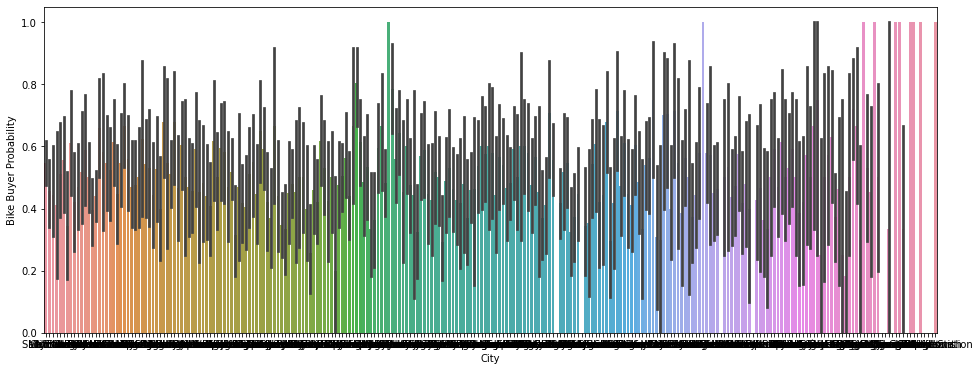

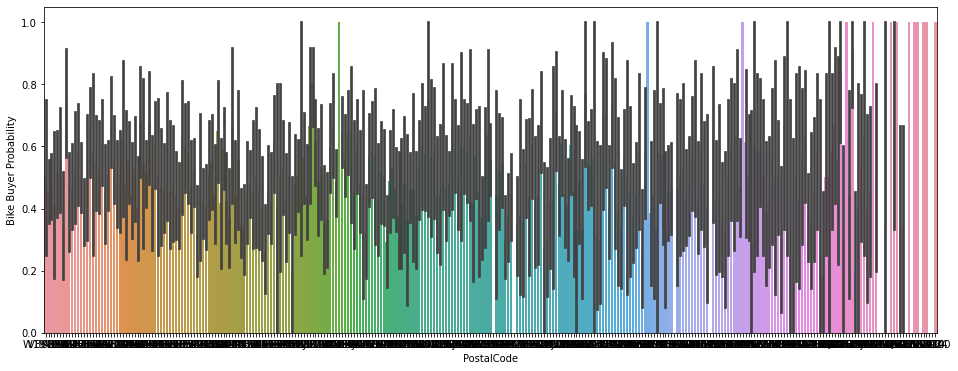

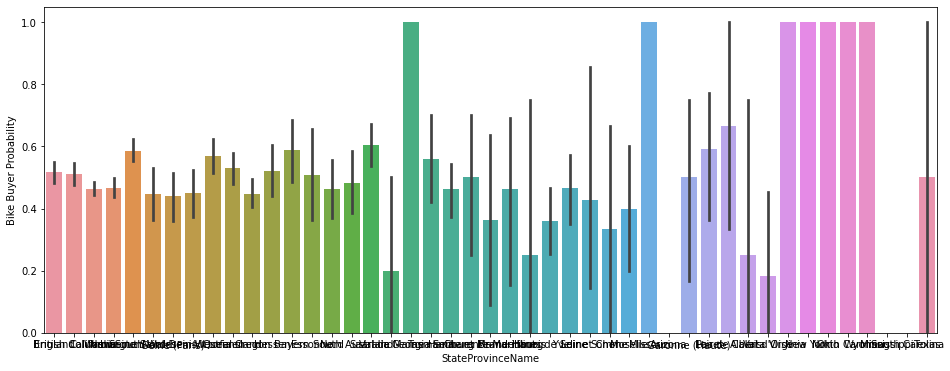

<Figure size 1152x432 with 0 Axes>

In [0]:
#Viewing Categorical Data against Targeted feature
for col in categorical_cols:
    g = sns.barplot(x=col, y="BikeBuyer",data=data)
    g = g.set_ylabel("Bike Buyer Probability")
    plt.show()
    fig = plt.figure(figsize=(16,6)) # this is to define plot area
    

In [0]:
train_data['Occupation'].value_counts()

Professional      2485
Skilled Manual    1845
Management        1330
Clerical          1095
Manual             930
Name: Occupation, dtype: int64

In [0]:
#Treating categorical data by replacing values
# Occupation
labels = train_data['Occupation'].astype("category").cat.categories.tolist()
occupation_replace = {'Occupation' : {a:b for a,b in zip(labels,list(range(1,len(labels)+1)))}}

train_data.replace(occupation_replace,inplace=True)

occupation_replace

{'Occupation': {'Clerical': 1,
  'Management': 2,
  'Manual': 3,
  'Professional': 4,
  'Skilled Manual': 5}}

In [0]:
train_data["Gender"].value_counts()

M    4024
F    3661
Name: Gender, dtype: int64

In [0]:
#Treating categorical data by replacing values
#Gender
labels = train_data['Gender'].astype("category").cat.categories.tolist()
gender_replace = {'Gender' : {a:b for a,b in zip(labels,list(range(1,len(labels)+1)))}}

train_data.replace(gender_replace,inplace=True)

gender_replace

{'Gender': {'F': 1, 'M': 2}}

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7685 entries, 0 to 7684
Data columns (total 25 columns):
CustomerID              7685 non-null float64
Title                   41 non-null object
FirstName               7685 non-null object
MiddleName              4457 non-null object
LastName                7685 non-null object
Suffix                  1 non-null object
AddressLine1            7685 non-null object
AddressLine2            135 non-null object
City                    7685 non-null object
StateProvinceName       7685 non-null object
CountryRegionName       7685 non-null object
PostalCode              7685 non-null object
PhoneNumber             7685 non-null object
Education               7685 non-null object
Occupation              7685 non-null int64
Gender                  7685 non-null int64
MaritalStatus           7685 non-null object
HomeOwnerFlag           7685 non-null float64
NumberCarsOwned         7685 non-null float64
NumberChildrenAtHome    7685 non-null float

In [0]:
train_data.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,14540.0,NaN,Randy,NaN,Lin,NaN,8848 Auburn,NaN,London,England,United Kingdom,W1Y 3RA,1 (11) 500 555-0138,Bachelors,3,2,M,1.0,0.0,0.0,1.0,35455.0,70.0,1,62
1,18054.0,NaN,Jake,NaN,Zeng,NaN,4058 First Ave,NaN,Cliffside,British Columbia,Canada,V8Y 1L1,987-555-0118,Bachelors,4,2,S,0.0,1.0,0.0,0.0,43980.0,69.0,0,59
2,16955.0,NaN,Nathaniel,NaN,Bradley,NaN,3679 Diablo View Road,NaN,Metchosin,British Columbia,Canada,V9,145-555-0167,Bachelors,5,2,M,1.0,0.0,2.0,2.0,57713.0,102.0,0,51
3,11626.0,NaN,Destiny,NaN,Rogers,NaN,3588 Vancouver Way,NaN,San Francisco,California,United States,94109,262-555-0170,Graduate Degree,5,1,M,1.0,0.0,0.0,1.0,53438.0,49.0,0,47
4,18651.0,NaN,Isaiah,A,Mitchell,NaN,5014 Steele Drive,NaN,Lynnwood,Washington,United States,98036,694-555-0195,High School,1,2,M,0.0,2.0,0.0,1.0,55291.0,73.0,0,65


In [0]:
#Treating categorical data by replacing values
# MaritalStatus
labels = train_data['MaritalStatus'].astype("category").cat.categories.tolist()
MaritalStatus_replace = {'MaritalStatus' : {a:b for a,b in zip(labels,list(range(1,len(labels)+1)))}}

train_data.replace(MaritalStatus_replace,inplace=True)

MaritalStatus_replace

{'MaritalStatus': {'M': 1, 'S': 2}}

In [0]:
train_data.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,14540.0,NaN,Randy,NaN,Lin,NaN,8848 Auburn,NaN,London,England,United Kingdom,W1Y 3RA,1 (11) 500 555-0138,Bachelors,3,2,1,1.0,0.0,0.0,1.0,35455.0,70.0,1,62
1,18054.0,NaN,Jake,NaN,Zeng,NaN,4058 First Ave,NaN,Cliffside,British Columbia,Canada,V8Y 1L1,987-555-0118,Bachelors,4,2,2,0.0,1.0,0.0,0.0,43980.0,69.0,0,59
2,16955.0,NaN,Nathaniel,NaN,Bradley,NaN,3679 Diablo View Road,NaN,Metchosin,British Columbia,Canada,V9,145-555-0167,Bachelors,5,2,1,1.0,0.0,2.0,2.0,57713.0,102.0,0,51
3,11626.0,NaN,Destiny,NaN,Rogers,NaN,3588 Vancouver Way,NaN,San Francisco,California,United States,94109,262-555-0170,Graduate Degree,5,1,1,1.0,0.0,0.0,1.0,53438.0,49.0,0,47
4,18651.0,NaN,Isaiah,A,Mitchell,NaN,5014 Steele Drive,NaN,Lynnwood,Washington,United States,98036,694-555-0195,High School,1,2,1,0.0,2.0,0.0,1.0,55291.0,73.0,0,65


In [0]:
drop_cols = ['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName', 'PostalCode', 'PhoneNumber']

train_data = train_data.drop(drop_cols, axis=1)

In [0]:
train_data.head()

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,United Kingdom,Bachelors,3,2,1,1.0,0.0,0.0,1.0,35455.0,70.0,1,62
1,Canada,Bachelors,4,2,2,0.0,1.0,0.0,0.0,43980.0,69.0,0,59
2,Canada,Bachelors,5,2,1,1.0,0.0,2.0,2.0,57713.0,102.0,0,51
3,United States,Graduate Degree,5,1,1,1.0,0.0,0.0,1.0,53438.0,49.0,0,47
4,United States,High School,1,2,1,0.0,2.0,0.0,1.0,55291.0,73.0,0,65


In [0]:
train_data.tail()

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
7680,Germany,Partial College,1,2,2,0.0,1.0,0.0,0.0,51903.0,68.0,1,44
7681,United Kingdom,Partial College,1,2,2,1.0,0.0,2.0,2.0,52622.0,87.0,1,50
7682,Australia,High School,5,2,1,1.0,2.0,0.0,3.0,50085.0,73.0,0,68
7683,United States,High School,1,2,1,0.0,2.0,0.0,2.0,50985.0,69.0,0,65
7684,United States,Partial College,4,1,2,1.0,0.0,2.0,5.0,102378.0,72.0,1,55


In [0]:
#Treating categorical data by replacing values
# Education
labels = train_data['Education'].astype("category").cat.categories.tolist()
education_replace = {'Education' : {a:b for a,b in zip(labels,list(range(1,len(labels)+1)))}}

train_data.replace(education_replace,inplace=True)

education_replace

{'Education': {'Bachelors ': 1,
  'Graduate Degree': 2,
  'High School': 3,
  'Partial College': 4,
  'Partial High School': 5}}

In [0]:
train_data.head()

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,United Kingdom,1,3,2,1,1.0,0.0,0.0,1.0,35455.0,70.0,1,62
1,Canada,1,4,2,2,0.0,1.0,0.0,0.0,43980.0,69.0,0,59
2,Canada,1,5,2,1,1.0,0.0,2.0,2.0,57713.0,102.0,0,51
3,United States,2,5,1,1,1.0,0.0,0.0,1.0,53438.0,49.0,0,47
4,United States,3,1,2,1,0.0,2.0,0.0,1.0,55291.0,73.0,0,65


In [0]:
data['CountryRegionName'].value_counts()

United States     3226
Australia         1537
United Kingdom     820
France             731
Germany            726
Canada             645
Name: CountryRegionName, dtype: int64

In [0]:
#Treating categorical data by replacing values
# CountryRegionName
labels = train_data['CountryRegionName'].astype("category").cat.categories.tolist()
CountryRegionName_replace = {'CountryRegionName' : {a:b for a,b in zip(labels,list(range(1,len(labels)+1)))}}

train_data.replace(CountryRegionName_replace,inplace=True)

CountryRegionName_replace

{'CountryRegionName': {'Australia': 1,
  'Canada': 2,
  'France': 3,
  'Germany': 4,
  'United Kingdom': 5,
  'United States': 6}}

In [0]:
train_data.head()

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,5,1,3,2,1,1.0,0.0,0.0,1.0,35455.0,70.0,1,62
1,2,1,4,2,2,0.0,1.0,0.0,0.0,43980.0,69.0,0,59
2,2,1,5,2,1,1.0,0.0,2.0,2.0,57713.0,102.0,0,51
3,6,2,5,1,1,1.0,0.0,0.0,1.0,53438.0,49.0,0,47
4,6,3,1,2,1,0.0,2.0,0.0,1.0,55291.0,73.0,0,65


MODELING

In [0]:

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score


# def get_mae(pred, target):
#   return mean_absolute_error(true, pred)

def cross_validate(model, nfolds, feats, targets):
    score = -1 * (cross_val_score(model, feats, targets, cv=nfolds, scoring='accuracy'))
    return np.mean(score)

**Decision Tree Classifier**
The decision tree can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a treelike model of decisions. Though a commonly used tool in data mining for deriving a strategy to reach a particular goal, its also
widely used in machine learning. 

In [0]:
#from sklearn.tree import DecisionTreeClassifier
#decision_tree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=2)
#print("Accuracy Score: ", cross_validate(decision_tree, 10, X_train, Y_train))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)


from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)


print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))